In [1]:
import os
from scipy.interpolate import interp1d
import kernel_est_funcs as kef
import remove_outliers as ro

In [2]:
# If in Colab and not yet downloaded, download GitHub repository
if os.getcwd() == '/content': 
    if not os.path.exists('/content/Cascade'):
        !git clone https://github.com/HelmchenLabSoftware/Cascade
    os.chdir('Cascade')
    
# If executed as jupyter notebook on own computer, change to parent directory for imports
if os.path.basename( os.getcwd() ) == 'Demo scripts':
    %cd ..
    print('New working directory:', os.getcwd() )

# set environment variables depending on colab or jupyter environment
if os.getcwd() == '/content/Cascade':
    ENV = 'colab'
else: # assume jupyter
    ENV = 'jupyter'
    #%matplotlib notebook

In [3]:
# Imports:
import matplotlib.pyplot as plt
import numpy as np

from cascade2p import utils
import ipywidgets as widgets

## Load datasets
datasets = utils.load_all_ground_truth( ground_truth_folder='Ground_truth')
dataset_names = sorted(list( datasets.keys() ))

plt.style.use('seaborn-v0_8')

print('\nSuccessfully loaded ground truth data.')


Successfully loaded ground truth data.


In [4]:
#@markdown Click the play button on the left to initialize the interactive exploration. Use the dropdown menu (`Dataset`) to select a dataset und use the slider (`Recording`) to switch between different continuous recordings. For some datasets, several recordings exist for the same neuron.

#@markdown Use the other two sliders to zoom into the plot (`Zoom`) and to move along the time axis (`Offset`).

#@markdown If you run this in a Jupyter notebook, you can use the magnifying glass button to draw rectangles with the left mouse button to zoom in, and the right mouse button to zoom out.

def plot_neuron(Dataset, Recording, Zoom=1, Offset=0):
    """Plot the fluorescence and spikes for a single recording of the dataset
    
    Parameters
    -------
    Dataset: str
        Name of the dataset, which is identical to the folder name in the Ground_truth folder
    Recording: int
        Number of the recording in this dataset, pooled across all files in this dataset
    """

    # correct for different plot sizes in colab and jupyter
    if ENV=='colab':   plt.figure(figsize=(20,8))
    if ENV=='jupyter': plt.figure(figsize=(8,5))
    
    
    data = datasets[Dataset][Recording]
    # plt.cla()
    plt.plot( data['t'][4:], data['dff'][4:], lw=0.5)
    
    max_dff = np.max( data['dff'][4:])
    min_dff = np.min( data['dff'][4:])
    
    plt.eventplot( data['spikes'], lineoffsets=min_dff - max_dff/20,
                  linelengths=max_dff/20, color='k', lw=1.5)
    
    # TODO: add number of APs if they are very close to each other or firing rate
    
    plt.xlabel('Time [s]')
    plt.ylabel('Relative Fluorescence Change [Df/f]')
    plt.title('Dataset: {}   Recording: {}   Frame rate: {:.1f} Hz'.format(Dataset, Recording, data['frame_rate']))
    
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Adjust zoom and offset
    if (Zoom != 1) or (Offset != 0):
        t_min = Offset
        t_max = (data['t'][-1] / Zoom) + Offset
        plt.xlim( (t_min, t_max) )
    
dataset_widget = widgets.Dropdown(options=dataset_names, value =dataset_names[9] )
recording_widget = widgets.IntSlider(min=0, max=100, step=1, value=0, continuous_update=False)

# update number of recordings depending on dataset
def update_nr_recordings(*args):
    recording_widget.max = len( datasets[dataset_widget.value] ) - 1
    
dataset_widget.observe( update_nr_recordings, 'value')
    
widgets.interact(plot_neuron, Dataset=dataset_widget,
                            Recording=recording_widget,
                            Zoom=widgets.IntSlider(min=1, max=50, step=1, value=1, continuous_update=False),
                            Offset=widgets.IntSlider(min=0, max=100, step=1, value=0, continuous_update=False)            
                )

# update manually the first time:
update_nr_recordings()

interactive(children=(Dropdown(description='Dataset', index=9, options=('DS01-OGB1-m-V1', 'DS02-OGB1-2-m-V1', …

In [7]:
dataset_names

['DS01-OGB1-m-V1',
 'DS02-OGB1-2-m-V1',
 'DS03-Cal520-m-S1',
 'DS04-OGB1-zf-pDp',
 'DS05-Cal520-zf-pDp',
 'DS06-GCaMP6f-zf-aDp',
 'DS07-GCaMP6f-zf-dD',
 'DS08-GCaMP6f-zf-OB',
 'DS09-GCaMP6f-m-V1',
 'DS10-GCaMP6f-m-V1-neuropil-corrected',
 'DS11-GCaMP6f-m-V1-neuropil-corrected',
 'DS12-GCaMP6s-m-V1-neuropil-corrected',
 'DS13-GCaMP6s-m-V1-neuropil-corrected',
 'DS14-GCaMP6s-m-V1',
 'DS15-GCaMP6s-m-V1',
 'DS16-GCaMP6s-m-V1',
 'DS17-GCaMP5k-m-V1',
 'DS18-R-CaMP-m-CA3',
 'DS19-R-CaMP-m-S1',
 'DS20-jRCaMP1a-m-V1',
 'DS21-jGECO1a-m-V1',
 'DS22-OGB1-m-SST-V1',
 'DS23-OGB1-m-PV-V1',
 'DS24-GCaMP6f-m-PV-V1',
 'DS25-GCaMP6f-m-SST-V1',
 'DS26-GCaMP6f-m-VIP-V1',
 'DS27-GCaMP6f-m-PV-vivo-V1',
 'X-DS00-OGB1-m-S1',
 'X-DS09-GCaMP6f-m-V1',
 'X-DS10-GCaMP6f-m-V1',
 'X-DS11-GCaMP6s-m-V1',
 'X-DS12-GCaMP6s-m-V1',
 'X-NAOMi-GCaMP6f-simulated']

In [8]:
rec = 0
data = datasets['DS20-jRCaMP1a-m-V1'][rec]
dff = data['dff']
times = data['t']
spikes = data['spikes']
%matplotlib inline
#plt.figure(figsize=(20, 5))
#plt.plot(dff)
#diffs = np.diff(dff)
#plt.hist(diffs)


In [9]:
print(data)

{'dff': array([ 0.00895357,  0.0469725 , -0.00034   , ...,  0.06953513,
        0.06374469,  0.03869026]), 't': array([3.282500e-02, 9.940000e-02, 1.660000e-01, ..., 3.194687e+02,
       3.195353e+02, 3.196019e+02]), 'spikes': array([ 20.6983,  46.6854,  61.7221,  61.7337,  61.7394,  61.7466,
        61.7582,  61.7682,  63.7441,  63.7487,  63.7544,  63.7643,
        63.7767,  63.7846,  63.8318,  63.8417,  93.7645,  94.8881,
        94.8929,  94.9   , 103.709 , 103.7268, 103.733 , 103.7406,
       109.9036, 110.7884, 110.7962, 110.8026, 110.812 , 141.4461,
       164.8676, 167.6613, 167.6669, 167.6728, 167.6822, 180.7651,
       180.7722, 180.7785, 180.7866, 236.4324, 236.4391, 236.4461,
       236.4542, 237.465 , 253.5747, 253.581 , 253.5879, 253.5962,
       253.618 , 255.5219, 255.527 , 255.5329, 255.5434, 269.741 ,
       269.7477, 286.6147, 286.6217, 286.6297, 287.8974, 287.9034,
       287.9089, 287.9193, 287.9292, 300.3516, 301.355 , 302.4336,
       302.442 ]), 'frame_rate': np.

events are not evenly spaced in time.

(array([4.000e+00, 8.000e+00, 1.000e+00, 6.000e+00, 2.400e+01, 1.600e+01,
        6.000e+01, 2.980e+02, 5.870e+02, 3.795e+03]),
 array([0.0663   , 0.0663325, 0.066365 , 0.0663975, 0.06643  , 0.0664625,
        0.066495 , 0.0665275, 0.06656  , 0.0665925, 0.066625 ]),
 <BarContainer object of 10 artists>)

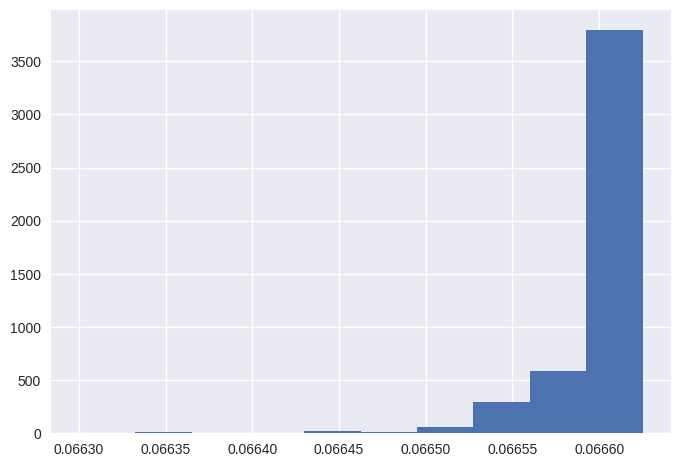

In [10]:
diffs = np.diff(times)
plt.hist(diffs)

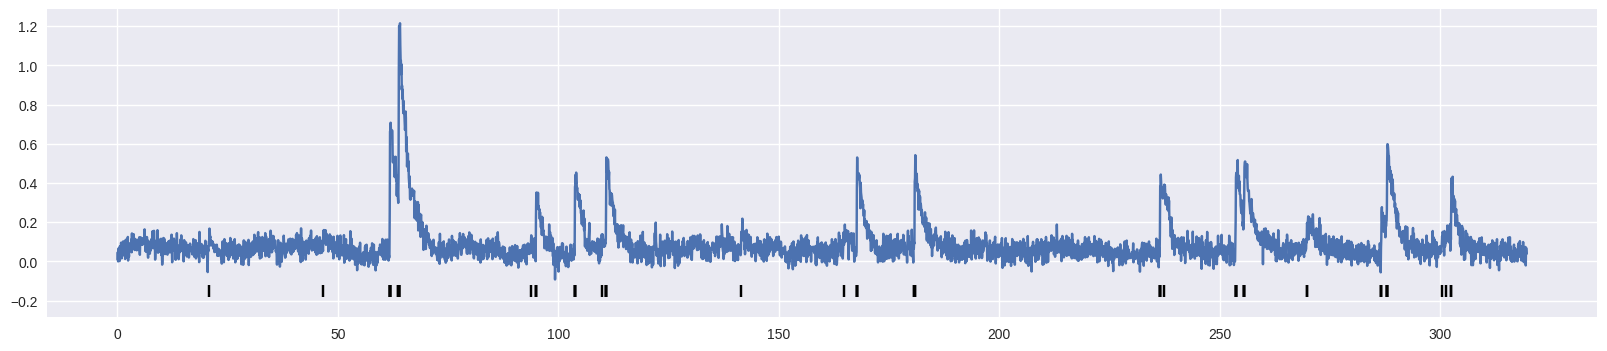

In [11]:
max_dff = np.max(dff[4:])
min_dff = np.min(dff[4:])
plt.figure(figsize=(20, 4))
plt.eventplot(spikes, lineoffsets=min_dff - max_dff/20, linelengths=max_dff/20, color='k')
plt.plot(times, dff)

### Up-sampling

In [12]:
ups_signal, ups_spikes = kef.upsample(times, dff, spikes, 1000)

In [13]:
%matplotlib qt
plt.plot(ups_signal)
plt.scatter(1000*times, dff, color='r', marker='.')

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in ""


In [14]:
ups_smooth_signal, ups_smooth_deriv = kef.smoothed_signals(ups_signal, 301)

In [15]:
cut_signal, cut_deriv = kef.cut_spikes(ups_spikes, ups_smooth_signal, ups_smooth_deriv, win_len=100)

In [16]:
%matplotlib qt
plt.plot(cut_signal)
plt.plot(cut_deriv*30)

In [21]:
1/kef.pure_fit(cut_signal, cut_deriv, do_plot=True)

np.float64(-2285.638252336539)

In [22]:
tau_est = kef.pure_fit(cut_signal, cut_deriv, do_plot=True)

In [23]:
1/kef.iqr_outlier(cut_signal, cut_deriv, do_plot=True, percentile_start=10, percentile_end=45)

np.float64(-2132.679752073958)

In [24]:
1/kef.pure_fit(ups_smooth_signal, ups_smooth_deriv, do_plot=True)

np.float64(-2926557.6695512063)

correlation check

In [25]:
reconst = ups_smooth_deriv + (-tau_est)*ups_smooth_signal

plt.eventplot(ups_spikes, lineoffsets=np.min(ups_smooth_signal), linelengths=np.max(ups_smooth_signal)/20, linewidths=.5, color='k')
#plt.plot(ups_smooth_signal)
#plt.plot(30*ups_smooth_deriv)
plt.plot(30*reconst)
#plt.legend(['spikes', 'signal', 'derivative', 'reconst'])

In [26]:
spikes_train = np.zeros(np.shape(ups_smooth_signal)) 
spikes_train[ups_spikes.astype(int)] = 1

In [27]:
import numpy as np
from scipy.signal import butter, lfilter
import matplotlib.pyplot as plt

# Assuming 'original_signal' and 'reconstructed_signal' are your signals as numpy arrays

original_signal = spikes_train
reconstructed_signal = reconst

# Define filter parameters
order = 5  # Filter order
cutoff_freq = 10.0  # Cutoff frequency in Hz

# Normalize the cutoff frequency by the Nyquist frequency
nyquist = 0.5 * len(original_signal)  # Nyquist frequency is half of the sample rate
normal_cutoff = cutoff_freq / nyquist

# Design Butterworth low-pass filter
b, a = butter(order, normal_cutoff, btype='low', analog=False)

# Apply the filter to both signals
filtered_original_signal = lfilter(b, a, original_signal)
filtered_reconstructed_signal = lfilter(b, a, reconstructed_signal)

# Plot the original and filtered signals
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(original_signal, label='Original Signal')
plt.plot(filtered_original_signal, label='Filtered Signal')
plt.legend()
plt.title('Original and Filtered Original Signals')

plt.subplot(2, 1, 2)
plt.plot(reconstructed_signal, label='Reconstructed Signal')
plt.plot(filtered_reconstructed_signal, label='Filtered Signal')
plt.legend()
plt.title('Reconstructed and Filtered Reconstructed Signals')

plt.tight_layout()
plt.show()


In [28]:
import numpy as np
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt

def create_binary_mask(original_signal, threshold=0.5):
    binary_mask = original_signal > threshold
    return binary_mask.astype(float)

def binary_mask_filter(signal, binary_mask, order=5, cutoff_freq=10.0):
    nyquist = 0.5 * len(signal)
    normal_cutoff = cutoff_freq / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    filtered_signal = signal.copy()
    filtered_signal[~binary_mask.astype(bool)] = filtfilt(b, a, signal[~binary_mask.astype(bool)])
    return filtered_signal

# Assuming 'original_signal' and 'reconstructed_signal' are your signals as numpy arrays

# Create a binary mask based on the original signal
binary_mask = create_binary_mask(original_signal)

# Apply binary mask filter to the reconstructed signal
filtered_reconstructed_signal = binary_mask_filter(reconstructed_signal, binary_mask)

# Plot the original and filtered signals
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(original_signal, label='Original Signal')
plt.legend()
plt.title('Original Signal')

plt.subplot(2, 1, 2)
plt.plot(reconstructed_signal, label='Reconstructed Signal')
plt.plot(filtered_reconstructed_signal, label='Filtered Signal')
plt.legend()
plt.title('Reconstructed and Filtered Reconstructed Signals')

plt.tight_layout()
plt.show()


In [29]:
np.corrcoef(spikes_train, reconst)

array([[1.        , 0.09123681],
       [0.09123681, 1.        ]])

In [30]:
ups_spikes

array([ 20698.3,  46685.4,  61722.1,  61733.7,  61739.4,  61746.6,
        61758.2,  61768.2,  63744.1,  63748.7,  63754.4,  63764.3,
        63776.7,  63784.6,  63831.8,  63841.7,  93764.5,  94888.1,
        94892.9,  94900. , 103709. , 103726.8, 103733. , 103740.6,
       109903.6, 110788.4, 110796.2, 110802.6, 110812. , 141446.1,
       164867.6, 167661.3, 167666.9, 167672.8, 167682.2, 180765.1,
       180772.2, 180778.5, 180786.6, 236432.4, 236439.1, 236446.1,
       236454.2, 237465. , 253574.7, 253581. , 253587.9, 253596.2,
       253618. , 255521.9, 255527. , 255532.9, 255543.4, 269741. ,
       269747.7, 286614.7, 286621.7, 286629.7, 287897.4, 287903.4,
       287908.9, 287919.3, 287929.2, 300351.6, 301355. , 302433.6,
       302442. ])

Number of all resampled data points are t(-1)-t(0)*new_rate. as we take only the integer part, we are throwing away some information and put as many as new_rate data points between each (integer) second.

??? this process will make some error between new spike times and signal!!!

In [31]:
%matplotlib inline
cum_signal = np.cumsum(ups_signal)
cum_spikes = np.cumsum(boolean_spikes)

plt.scatter(cum_spikes, cum_signal)

NameError: name 'boolean_spikes' is not defined

In [76]:
sig2, deriv2 = kef.smoothed_signals(ups_signal, 51)
kef.pure_fit(sig2, deriv2, do_plot=True)

-7.292960085953128e-07

-0.00018716611236248133

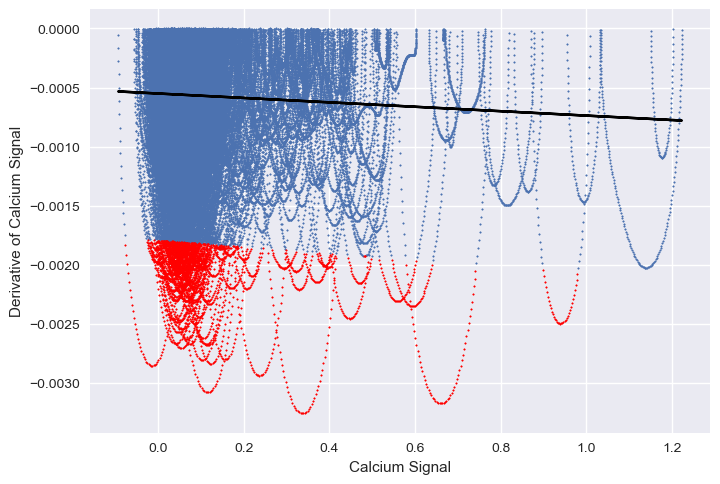

In [13]:
sig1, deriv1 = kef.smoothed_signals(ups_signal, 51, neg=True)
kef.iqr_outlier(sig1, deriv1, do_plot=True)

In [14]:
100000/79

1265.8227848101267

4.86391388886307e-07

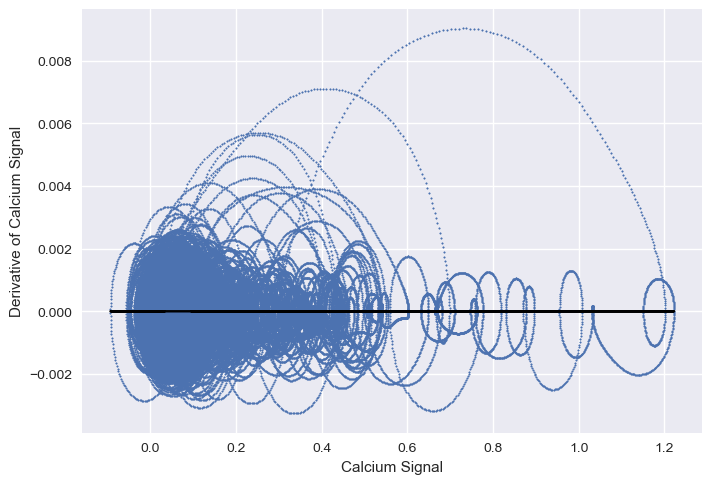

In [15]:
sig3, deriv3 = kef.smoothed_signals(ups_signal, 51)
sig4, deriv4 = kef.cut_spikes(spikes, sig3, deriv3, win_len=500)
kef.iqr_outlier(sig4, deriv4, percentile_start=0, percentile_end=100, do_plot=True)

In [16]:
len(sig4)

318287

In [17]:
len(sig3)

319569

In [55]:
100000/47

2127.659574468085